In [1]:
import numpy as np
from myplotstyle import plt, FIG_WIDTH

from easyquery import Query, QueryMaker
import SAGA
from SAGA import ObjectCuts as C
from SAGA import HostCuts as H

from scipy.stats import gaussian_kde

In [2]:
print(SAGA.__version__)
saga = SAGA.QuickStart()

3.0.0
SAGA `shared_dir` set to /home/yymao/Dropbox/Work/SAGA
SAGA `local_dir`  set to /home/yymao/Documents/Work/Data/SAGA


In [3]:
base = H.paper3.filter(saga.object_catalog.load_combined_base_catalog())
nhosts = len(np.unique(base["HOSTID"]))
assert nhosts == 101

In [4]:
base = Query(C.is_clean2, C.is_galaxy2, C.sat_rcut, C.has_spec, ~C.is_host, "SPEC_Z >= 0.002", "SPEC_Z < 0.06", "log_sm >= 5", "log_sm < 11").filter(base)
sats, non_sats = C.is_sat.split(base)

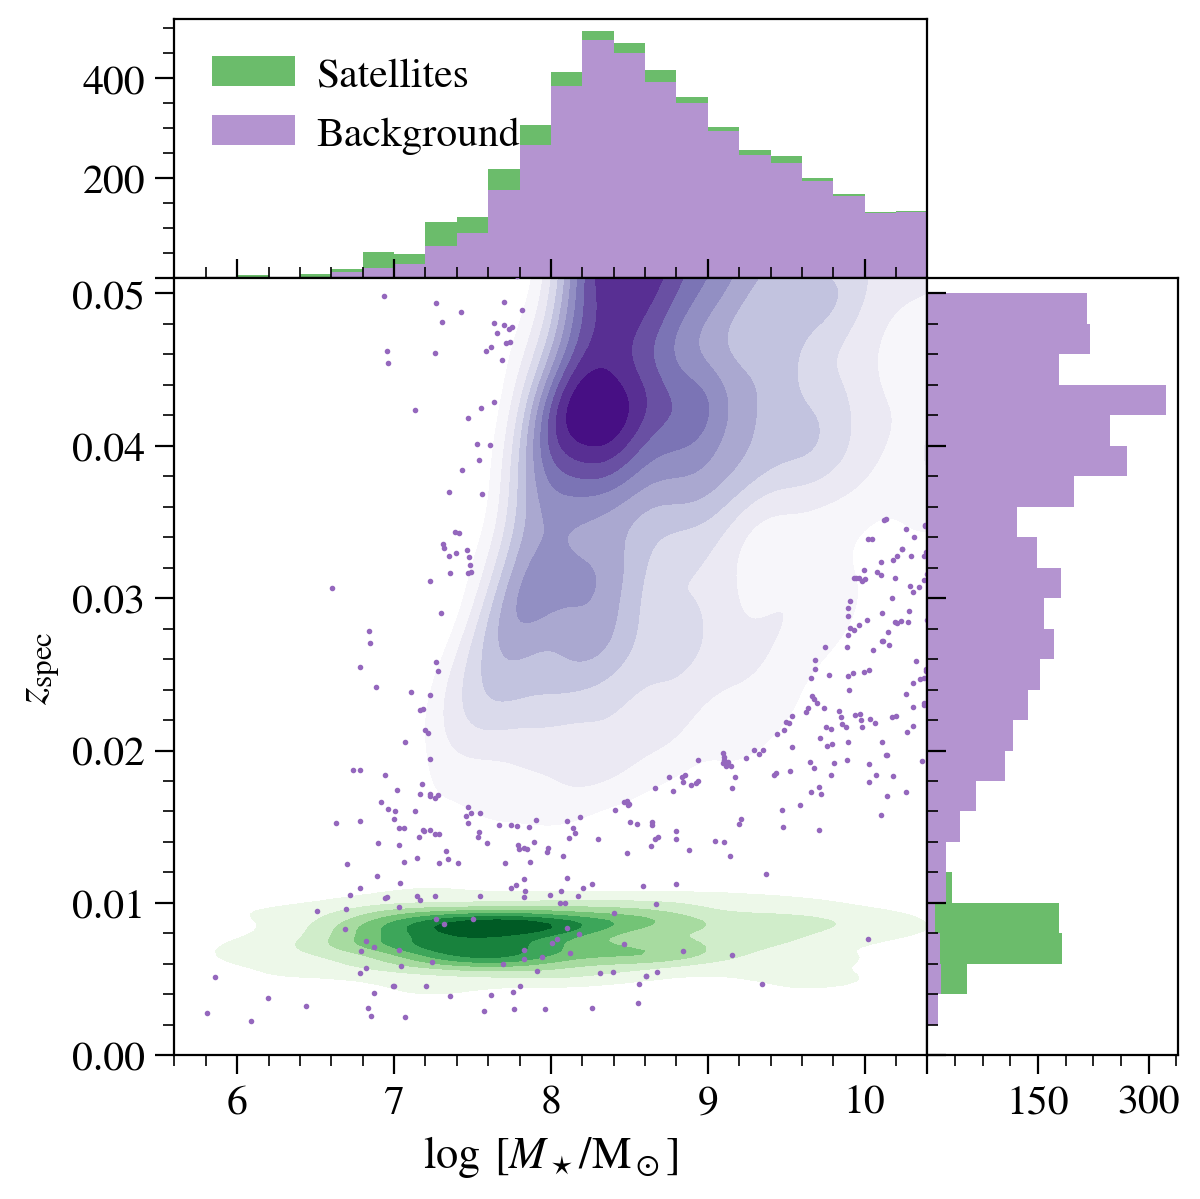

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(FIG_WIDTH, FIG_WIDTH), width_ratios=(3, 1), height_ratios=(1,3))
fig.set_constrained_layout_pads(hspace=0, wspace=0, h_pad=0, w_pad=0)

ax[0,1].axis('off')

ax[0,0].tick_params(axis="x", which="both", direction="in")
ax[0,0].set_xticklabels([])
ticks = np.arange(3) * 200
ax[0,0].set_yticks(ticks)
ax[0,0].set_yticklabels([str(t) if t else "" for t in ticks])

ax[1,1].tick_params(axis="y", which="both", direction="in")
ticks = np.arange(3) * 150
ax[1,1].set_xticks(ticks)
ax[1,1].set_xticklabels([str(t) if t else "" for t in ticks])
ax[1,1].set_yticklabels([])

x_bins = np.linspace(5.6, 10.4, 25)
y_bins = np.linspace(0.002, 0.05, 25)

ax[0,0].hist([non_sats["log_sm"], sats["log_sm"]], bins=x_bins, histtype="barstacked", color=["C4", "C2"], alpha=0.7, label=["Background", "Satellites"])
ax[1,1].hist([non_sats["SPEC_Z"], sats["SPEC_Z"]], bins=y_bins, histtype="barstacked", color=["C4", "C2"], alpha=0.7, orientation='horizontal')

ax[0,0].legend(fontsize="small")
ax_this = ax[1,0]

X, Y = np.mgrid[5.6:10.4:251j, 0.002:0.055:251j]

kernel = gaussian_kde(np.vstack([non_sats["log_sm"], non_sats["SPEC_Z"]]), 0.18)
Z = np.reshape(kernel(np.vstack([X.ravel(), Y.ravel()])).T, X.shape)
CS = ax_this.contourf(X, Y, Z, cmap=plt.cm.Purples, levels=np.linspace(2.8, Z.max(), 11))

mask = kernel(np.vstack([non_sats["log_sm"], non_sats["SPEC_Z"]])) < 3
ax_this.scatter(non_sats["log_sm"][mask], non_sats["SPEC_Z"][mask], c='C4',marker='o',s=1, zorder=97)

X, Y = np.mgrid[5.6:10.4:251j, 0.002:0.013:51j]
kernel = gaussian_kde(np.vstack([sats["log_sm"], sats["SPEC_Z"]]), 0.36)
Z = np.reshape(kernel(np.vstack([X.ravel(), Y.ravel()])).T, X.shape)
CS = ax_this.contourf(X, Y, Z, cmap=plt.cm.Greens, levels=np.linspace(5.6, Z.max(), 8))
#mask = kernel(np.vstack([sats["log_sm"], sats["SPEC_Z"]])) < 10
#ax_this.scatter(sats["log_sm"][mask], sats["SPEC_Z"][mask], c='C4',marker='s',s=1, zorder=99)

ax_this.set_xlim(5.6, 10.4)
ax[0,0].set_xlim(5.6, 10.4)
ax_this.set_ylim(0, 0.051)
ax[1,1].set_ylim(0, 0.051)
ax_this.set_xlabel("$\\log\\;[M_\\star/{\\rm M}_\\odot]$")
ax_this.set_ylabel(r'$z_{\rm spec}$')

ax[0,0].legend(*[[hl[i] for i in [1,0]] for hl in ax[0,0].get_legend_handles_labels()])

plt.savefig("plots/redshift-mass-dist.pdf")